In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Here is our data, lets' analys some ponts about our data before starting working on it.

So first of all as an general inroducton about our data - This dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.
There are total 43 columns in it containing different grades of students by which we need to predict CGPA of student which is our target valriable.
Let's analys and find out which coluumn is more important for us also check for different factors that we can work better on our data.

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting CGPA

In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


Here we can see last 5 rows of our dataset which shows the same thing as top 5 as it's a Regression model 

In [6]:
df.shape

(571, 43)

By the above function we can see that we are having 571 rows and 43 columns  in our dataset.

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [8]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

By the above function we can see that our all the 43 columns are having object column and to analys and proceed further with machine learning first we need to change them int which we'll do further.

In [9]:
df.info()

<bound method DataFrame.info of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-4

In [4]:
df.drop(columns=['Seat No.'], inplace=True)

let's drop seat number columns as it is not contribution and just having a unique seat number for every student like ID

In [5]:
from sklearn.preprocessing import LabelEncoder
string_columns = df.select_dtypes(include=['object']).columns

In [6]:
label_encoders = {}
for column in string_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder


In [7]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [20]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.565773,0.508231,0.487830,0.609990,0.319649,0.443420,0.589250,0.548820,...,0.140798,0.499998,0.410585,0.383521,0.429313,0.264933,0.529531,0.199127,0.563519,-0.663135
HS-101,0.382436,1.000000,0.334536,0.473146,0.441847,0.400713,0.321346,0.359801,0.323381,0.345819,...,0.244502,0.369839,0.265502,0.336850,0.103657,0.257124,0.309970,0.265646,0.251702,-0.537170
CY-105,0.565773,0.334536,1.000000,0.516758,0.554936,0.587845,0.404763,0.466034,0.501859,0.485183,...,0.381171,0.539259,0.578483,0.482884,0.223139,0.206669,0.551183,0.267375,0.360315,-0.670190
HS-105/12,0.508231,0.473146,0.516758,1.000000,0.505049,0.493581,0.516214,0.373136,0.425518,0.334125,...,0.337579,0.514041,0.512334,0.484061,0.184283,0.242515,0.518199,0.313219,0.267519,-0.627644
MT-111,0.487830,0.441847,0.554936,0.505049,1.000000,0.416784,0.528063,0.568940,0.422151,0.478874,...,0.534544,0.581354,0.490726,0.577514,0.101744,0.327353,0.558593,0.470404,0.224883,-0.756109
CS-105,0.609990,0.400713,0.587845,0.493581,0.416784,1.000000,0.310666,0.377496,0.522205,0.464978,...,0.147291,0.421923,0.362033,0.325876,0.379277,0.231224,0.383126,0.142609,0.448979,-0.613169
CS-106,0.319649,0.321346,0.404763,0.516214,0.528063,0.310666,1.000000,0.365975,0.304044,0.317611,...,0.519912,0.458346,0.506503,0.471248,0.033116,0.231097,0.490585,0.410040,0.114769,-0.563178
EL-102,0.443420,0.359801,0.466034,0.373136,0.568940,0.377496,0.365975,1.000000,0.464624,0.492613,...,0.396578,0.515770,0.406288,0.461098,0.103903,0.362837,0.470345,0.463383,0.256816,-0.669536
EE-119,0.589250,0.323381,0.501859,0.425518,0.422151,0.522205,0.304044,0.464624,1.000000,0.575298,...,0.224754,0.472092,0.409814,0.420696,0.341455,0.299075,0.512645,0.318122,0.427765,-0.668787
ME-107,0.548820,0.345819,0.485183,0.334125,0.478874,0.464978,0.317611,0.492613,0.575298,1.000000,...,0.281174,0.504715,0.416972,0.428022,0.259143,0.272818,0.511910,0.315812,0.412971,-0.677342


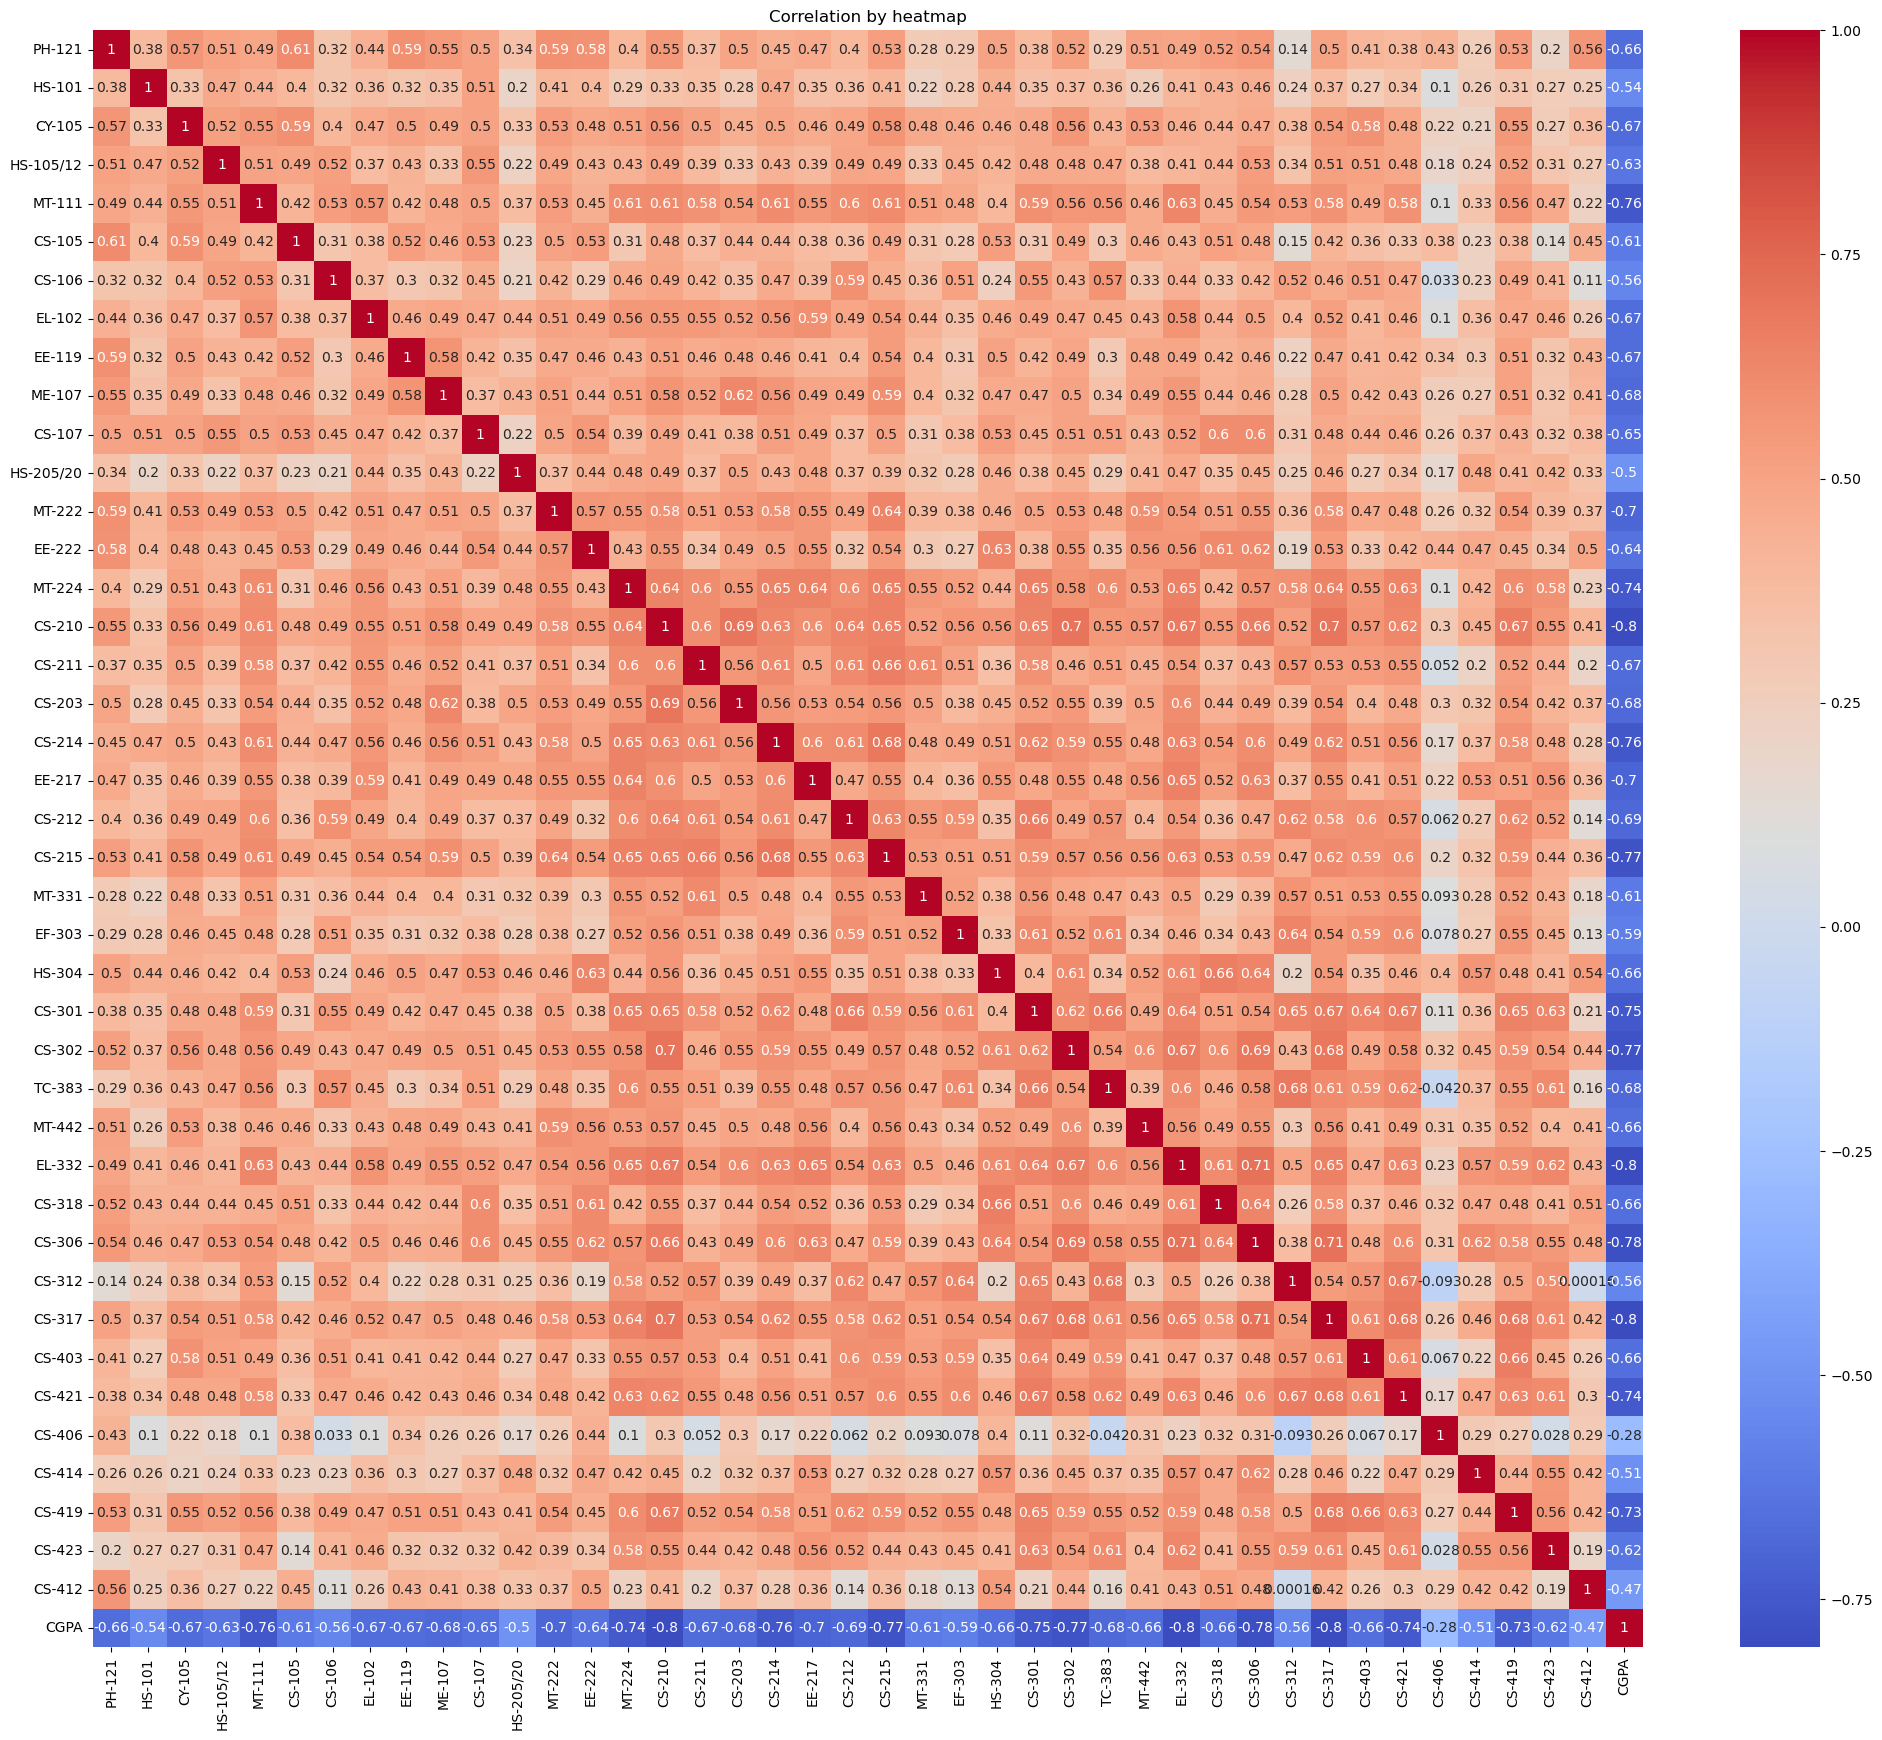

In [23]:
correlation = df.corr()
plt.figure(figsize=(25, 21))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

In [24]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int32  
 1   HS-101     571 non-null    int32  
 2   CY-105     571 non-null    int32  
 3   HS-105/12  571 non-null    int32  
 4   MT-111     571 non-null    int32  
 5   CS-105     571 non-null    int32  
 6   CS-106     571 non-null    int32  
 7   EL-102     571 non-null    int32  
 8   EE-119     571 non-null    int32  
 9   ME-107     571 non-null    int32  
 10  CS-107     571 non-null    int32  
 11  HS-205/20  571 non-null    int32  
 12  MT-222     571 non-null    int32  
 13  EE-222     571 non-null    int32  
 14  MT-224     571 non-null    int32  
 15  CS-210     571 non-null    int32  
 16  CS-211     571 non-null    int32  
 17  CS-203     571 non-null    int32  
 18  CS-214     571 non-null    int32  
 19  EE-217     571 non-null    int32  
 20  CS-212    

<Axes: >

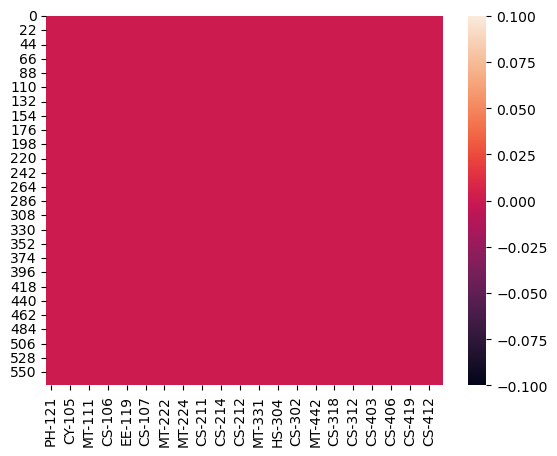

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.nunique().to_frame("Unique values")

,Unique values
PH-121,13
HS-101,12
CY-105,14
HS-105/12,14
MT-111,14
CS-105,11
CS-106,14
EL-102,14
EE-119,13
ME-107,14


In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,4.817863,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,3.179170,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(1, 0, 'PH-121'),
  Text(2, 0, 'HS-101'),
  Text(3, 0, 'CY-105'),
  Text(4, 0, 'HS-105/12'),
  Text(5, 0, 'MT-111'),
  Text(6, 0, 'CS-105'),
  Text(7, 0, 'CS-106'),
  Text(8, 0, 'EL-102'),
  Text(9, 0, 'EE-119'),
  Text(10, 0, 'ME-107'),
  Text(11, 0, 'CS-107'),
  Text(12, 0, 'HS-205/20'),
  Text(13, 0, 'MT-222'),
  Text(14, 0, 'EE-222'),
  Text(15, 0, 'MT-224'),
  Text(16, 0, 'CS-210'),
  Text(17, 0, 'CS-211'),
  Text(18, 0, 'CS-203'),
  Text(19, 0, 'CS-214'),
  Text(20, 0, 'EE-217'),
  Text(21, 0, 'CS-212'),
  Text(22, 0, 'CS-215'),
  Text(23, 0, 'MT-331'),
  Text(24, 0, 'EF-303'),
  Text(25, 0, 'HS-304'),
  Text(26, 0, 'CS-301'),
  Text(27, 0, 'CS-302'),
  Text(28, 0, 'TC-383'),
  Text(29, 0, 'MT-442'),
  Text(30, 0, 'EL-332'),
  Text(31, 0, 'CS-318'),
  Text(32, 0, 'CS-306'),
  Text(33

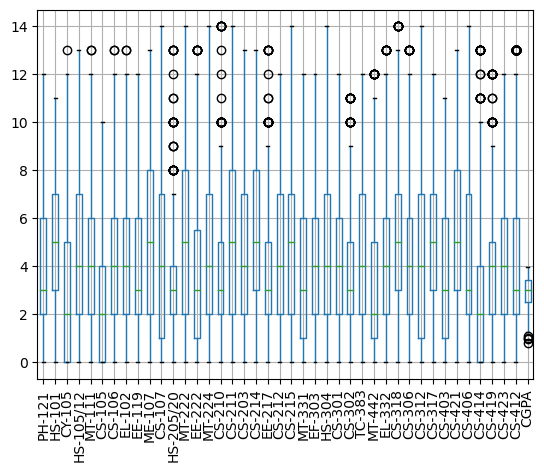

In [8]:
df.boxplot()
plt.xticks(rotation=90)

In [9]:
#Let's find outlier with Zscore method
outliers=df[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']]
z=np.abs(zscore(outliers))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.698822,0.540054,1.340711,2.657832,1.745703,1.302126,0.400191,1.001811,...,0.564427,1.034541,1.031780,1.387194,0.825261,0.607332,0.919723,1.475118,0.398941,0.629839
1,1.242052,1.411559,2.367806,1.473569,0.351207,1.173242,1.745703,1.300986,2.254972,1.316634,...,1.549013,1.593674,1.373711,0.747382,1.168469,0.607332,0.787565,0.721726,0.588612,0.384854
2,1.242052,0.744483,0.977116,0.228883,0.021373,1.053643,0.302639,0.000570,0.712678,0.887129,...,0.748354,0.363289,0.677873,1.172056,0.138846,1.045748,0.919723,1.538450,0.728126,1.119808
3,1.714365,0.692879,2.367806,1.473569,1.670546,0.311348,2.106468,1.302126,1.884016,0.686988,...,1.220817,1.593674,0.347919,2.027007,0.825261,0.050291,0.104650,1.098422,0.917796,0.595086
4,0.585070,1.103823,0.308131,0.082289,1.297966,1.053643,0.779659,0.000570,1.454590,0.887129,...,0.748354,0.195843,0.335942,0.107569,0.204362,0.607332,0.919723,0.785058,0.728126,1.119808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.256579,1.822504,0.977116,0.704632,0.968131,1.053643,0.779659,0.650208,1.083634,0.257482,...,0.091964,0.642855,1.019804,1.172056,1.920400,1.045748,0.446107,0.031666,0.398941,1.119808
567,0.913561,1.822504,0.977116,1.326975,1.297966,1.053643,1.501191,0.650208,1.454590,1.516776,...,0.748354,0.083723,0.335942,1.172056,1.920400,0.607332,0.104650,0.785058,0.588612,0.629839
568,0.256579,1.822504,0.308131,0.082289,1.297966,1.053643,1.501191,1.300986,1.454590,0.572306,...,0.091964,0.642855,0.677873,1.172056,0.547570,1.045748,1.129023,0.031666,0.728126,0.629839
569,1.242052,0.385142,2.033314,1.326975,1.670546,2.657832,0.302639,1.302126,0.400191,1.001811,...,0.091964,1.314107,0.677873,0.212337,0.825261,0.927122,1.129023,0.408362,0.259427,0.350101


In [10]:
np.where(z>3)

(array([ 44,  44,  44,  44,  44,  44,  44,  44,  60,  60,  60,  60,  60,
         60,  86,  91,  91,  91, 137, 137, 137, 137, 137, 137, 137, 142,
        142, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 143, 281,
        281, 281, 281, 282, 282, 288, 288, 288, 288, 288, 288, 423, 424,
        481, 543, 565, 565, 565, 565, 565, 565], dtype=int64),
 array([ 2,  6, 11, 13, 15, 19, 24, 37,  2, 11, 13, 15, 24, 37, 37, 15, 24,
        37,  2, 11, 13, 15, 19, 24, 37, 11, 13, 15, 19, 24, 37,  2, 11, 13,
        15, 19, 24, 37,  6, 11, 24, 37, 24, 37, 11, 13, 15, 19, 24, 37, 37,
        37, 37, 37, 11, 13, 15, 19, 24, 37], dtype=int64))

In [11]:
df1=df[(z<3).all(axis=1)]

In [12]:
df1.shape

(556, 42)

In [13]:
df1.skew()

PH-121       0.561325
HS-101       0.059312
CY-105       0.961297
HS-105/12    0.325083
MT-111       0.428842
CS-105       0.963058
CS-106       0.610229
EL-102       0.474081
EE-119       0.553553
ME-107       0.091446
CS-107       0.393008
HS-205/20    0.765317
MT-222       0.167293
EE-222       0.728173
MT-224       0.393790
CS-210       0.647880
CS-211       0.075122
CS-203       0.243867
CS-214       0.006669
EE-217       0.672329
CS-212       0.401048
CS-215       0.120711
MT-331       0.604700
EF-303       0.352310
HS-304       0.515364
CS-301       0.380912
CS-302       0.570915
TC-383       0.321381
MT-442       0.852822
EL-332       0.431139
CS-318       0.333360
CS-306       0.392752
CS-312       0.402160
CS-317       0.150608
CS-403       0.603522
CS-421       0.130217
CS-406       1.214511
CS-414       1.204268
CS-419       0.471732
CS-423       0.496676
CS-412       1.189702
CGPA        -0.331705
dtype: float64

In [15]:
# let's use cube root methos to remove skewness from our data
df1['CS-414']=np.cbrt(df1['CS-414'])
df1['CS-406']=np.cbrt(df1['CS-406'])
df1['CS-412']=np.cbrt(df1['CS-412'])

In [16]:
df1.skew()

PH-121       0.561325
HS-101       0.059312
CY-105       0.961297
HS-105/12    0.325083
MT-111       0.428842
CS-105       0.963058
CS-106       0.610229
EL-102       0.474081
EE-119       0.553553
ME-107       0.091446
CS-107       0.393008
HS-205/20    0.765317
MT-222       0.167293
EE-222       0.728173
MT-224       0.393790
CS-210       0.647880
CS-211       0.075122
CS-203       0.243867
CS-214       0.006669
EE-217       0.672329
CS-212       0.401048
CS-215       0.120711
MT-331       0.604700
EF-303       0.352310
HS-304       0.515364
CS-301       0.380912
CS-302       0.570915
TC-383       0.321381
MT-442       0.852822
EL-332       0.431139
CS-318       0.333360
CS-306       0.392752
CS-312       0.402160
CS-317       0.150608
CS-403       0.603522
CS-421       0.130217
CS-406      -1.851134
CS-414      -0.751132
CS-419       0.471732
CS-423       0.496676
CS-412      -0.857808
CGPA        -0.331705
dtype: float64

In [22]:
df1.drop(columns=['CS-406'], inplace=True)

In [24]:
features = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
target = 'CGPA'

In [25]:
x = df1[features]
y = df1[target]

In [26]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (556, 40)
dimension of dependent variable: (556,)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [28]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.9894752206336385 on Randome_state 0


In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.7986811215806742
R2 score on training Data: 100.0
Mean Absolute Error: 0.20201197604790416
Mean Squared Error: 0.07873420359281438
Root Mean Squared Error: 0.2805961574804872


In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR=rfr.predict (x_test)
pred_train=rfr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RFR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.9381748480490335
R2 score on training Data: 99.21336220164815
Mean Absolute Error: 0.10869646706586797
Mean Squared Error: 0.024179322570658635
Root Mean Squared Error: 0.1554970178834907


In [32]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.9555608565075259
R2 score on training Data: 100.0
Mean Absolute Error: 0.09309586826347287
Mean Squared Error: 0.017379793682035894
Root Mean Squared Error: 0.1318324454830293


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.9618111429651391
R2 score on training Data: 99.70466374880287
Mean Absolute Error: 0.08630642399557951
Mean Squared Error: 0.014935356626102592
Root Mean Squared Error: 0.12221029672700492


In [34]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.9856606851719163
R2 score on training Data: 98.65513169085264
Mean Absolute Error: 0.05676743385016702
Mean Squared Error: 0.005607991371302154
Root Mean Squared Error: 0.07488652329559808


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[0.82210802 0.83203911 0.77141641 0.77342191 0.79754375]
0.7993058388637213
Difference between R2 score and cross validation score is : -79.13190276479146


In [37]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[0.95298491 0.94828328 0.95212032 0.94172719 0.92845268]
0.9447136769525024
Difference between R2 score and cross validation score is : -93.5331928472012


In [38]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[0.96616723 0.96033308 0.96074379 0.95778659 0.94487631]
0.9579814011283627
Difference between R2 score and cross validation score is : -94.84257925632875


In [39]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[0.95654775 0.96564265 0.96858496 0.96806574 0.95891109]
0.9635504375332757
Difference between R2 score and cross validation score is : -95.39323261036245


In [44]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[0.98084429 0.98805482 0.97667921 0.98248462 0.97456917]
0.9805264212912151
Difference between R2 score and cross validation score is : -97.06698144394959


In [45]:
#Lets test our data by grid search
from sklearn.model_selection import GridSearchCV

In [49]:
param={'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4],                
    'max_features': ['auto', 'sqrt', 'log2', None]}
gscv=GridSearchCV(DecisionTreeRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [50]:
gscv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [56]:
Model=DecisionTreeRegressor(max_depth=None,max_features ='sqrt',min_samples_leaf= 4,min_samples_split= 5)

In [57]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8054141658174871
Mean Absolute Error: 0.2052595737097234
Mean Squared Error: 0.0761009638295942
Root Mean Squared Error: 0.2758640314169178


In [58]:
import pickle
filename='World hapiness.pkl'
pickle.dump(Model,open(filename,'wb'))

In [59]:
Load_model=pickle.load(open('World hapiness.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

80.54141658174872


In [60]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [61]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
Predicted,2.6114,2.345667,3.8085,3.2374,2.3892,3.273875,2.1906,2.1582,3.9265,2.52525,...,3.340286,2.459857,1.736833,2.515167,2.52525,2.527167,3.40375,3.0925,3.340286,3.340286
Original,2.8610,1.714000,3.7720,3.5160,2.6030,3.332000,2.2740,1.8050,3.8760,2.59500,...,3.554000,2.914000,1.899000,2.631000,2.46800,2.957000,3.35800,3.0560,3.605000,3.574000


# Thank you 